#### The objective  of this notebook is to classify the conference titles The dataset consists of 2507 short research paper titles, which have been classified into 5 categories (by conferences). <br>
1. ISCAS
2. INFOCOM
3. VLDB
4. WWW
5. SIGGRAPH

#### The notebook demonstrates Text Cleaning, Text transformation and model building on text data using Naive Bayes classifier and Linear-SVM

### Libraries Used

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import model_selection, svm

### Loading the Dataset

In [39]:
### Classification of a document 

In [296]:
df=pd.read_csv('text_Data.csv')

In [297]:
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


In [298]:
df.shape

(2507, 2)

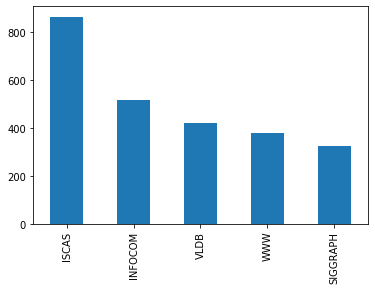

In [299]:
### Frequency count of Conference Paper
df.Conference.value_counts().plot(kind='bar')

### Data Cleaning by removing stop words, punctuations, numbers and lemmatizing the text 

In [409]:
def pos_tagging(tag):
    """ Converts Pos tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[tag[:2]]
    except:
        return 'n' # if mapping isn't found, fall back to Noun.

In [410]:
def clean_text(text):
    """ The functions splits the Text in token, remove stopwords and lemmatize the text"""
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # lemmatize text
    text = [t for t in text if len(t) > 0]
    pos_tags=pos_tag(text)
    #print(pos_tags)
    text=[WordNetLemmatizer().lemmatize(word.lower(), pos=pos_tagging(tag)) for word, tag in pos_tags]
    #text = [WordNetLemmatizer().lemmatize(w, pos="v") for w in text]
    text = [t for t in text if len(t) > 2]
    # join all
    text = " ".join(text)
    return(text)

In [406]:
df["Clean_titles"] = df["Title"].apply(lambda x: clean_text(x))

In [407]:
df['Clean_titles'].head()

0    innovation database management computer scienc...
1      high performance prime field multiplication gpu
2    enchant scissors scissor interface support cut...
3    detection channel degradation attack intermedi...
4    pin complex network betweenness centrality str...
Name: Clean_titles, dtype: object

### Data Transformation using TF-IDF

In [304]:
y = df['Conference']

In [305]:
X_train, X_test, y_train, y_test = train_test_split(df['Clean_titles'],y,test_size=0.30,random_state=53)

In [341]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english")

In [342]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

In [343]:
# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [344]:
print(tfidf_vectorizer.get_feature_names()[:10])

['absolutely', 'abstract', 'accelerate', 'acceleration', 'access', 'accessibility', 'accuracy', 'accurate', 'achieve', 'achievement']


In [345]:
## Inspecting the vector
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [346]:
tfidf_df.head()

,absolutely,abstract,accelerate,acceleration,access,accessibility,accuracy,accurate,achieve,achievement,...,year,yin,zero,zf,zip,zlib,zone,zoom,zoozbeat,zwick
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating a word cloud to see the most common words in the data

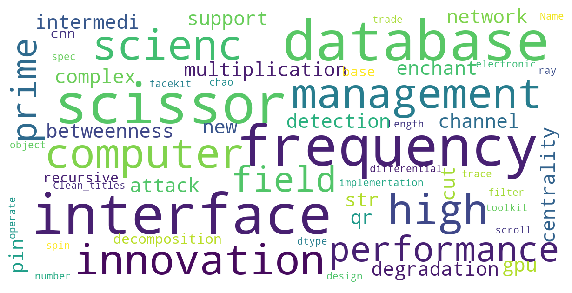

In [415]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 100,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (10, 10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
show_wordcloud(reviews_df["Clean_titles"])

### Fitting the Naive Bayes Model

In [350]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

In [351]:
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [352]:
pred = nb_classifier.predict(tfidf_test)

In [353]:
score = metrics.accuracy_score(y_test, pred)
print(score)

0.7118193891102258


In [354]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [355]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()

Alpha:  0.0
Score:  0.7131474103585658

Alpha:  0.1
Score:  0.7689243027888446

Alpha:  0.2
Score:  0.7755644090305445

Alpha:  0.30000000000000004
Score:  0.7702523240371846

Alpha:  0.4
Score:  0.7662682602921647

Alpha:  0.5
Score:  0.7596281540504648

Alpha:  0.6000000000000001
Score:  0.7609561752988048

Alpha:  0.7000000000000001
Score:  0.7556440903054449

Alpha:  0.8
Score:  0.7370517928286853

Alpha:  0.9
Score:  0.7211155378486056



### Extracting the top weighted feature in class label "INFOCOM" and "ISCAS"

In [416]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 5 feat_with_weights entries
print(class_labels[0], feat_with_weights[:5])

# Print the second class label and the bottom 5 feat_with_weights entries
print(class_labels[1], feat_with_weights[-5:])


INFOCOM [(-8.352224621070345, 'absolutely'), (-8.352224621070345, 'abstract'), (-8.352224621070345, 'accelerate'), (-8.352224621070345, 'acceleration'), (-8.352224621070345, 'accessibility')]
ISCAS [(-6.195905757621654, 'control'), (-6.164312586405044, 'rout'), (-6.0833821316095005, 'sensor'), (-5.384764630760336, 'wireless'), (-4.823140513372966, 'network')]


### Fitting SVM model

In [399]:
SVM = svm.SVC(C=1, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [400]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)

In [403]:
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",metrics.accuracy_score(y_test, predictions_SVM))

SVM Accuracy Score ->  0.7822045152722443
